In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://news.google.com/topstories?hl=zh-TW&gl=TW&ceid=TW:zh-Hant"

res = requests.get(url)

soup = BeautifulSoup(res.text,'html.parser')  #取得html資料，並做解析

titles = soup.select('.ipQwMb.ekueJc.RD0gLb')
links = soup.select('.VDXfz')

news_title = []
news_link = []

for each_title in titles:
    news_title.append(each_title.text)
    
for each_link in links:
        news_link.append("https://news.google.com"+each_link['href'].strip('.'))   #strip()可移除字串頭尾符號
    
df = pd.DataFrame(
{
    '標題':news_title,
    '內容連結':news_link
}
)
df

,標題,內容連結
0,快訊／新北新店驚傳砍人案！ 房仲不滿被炒...持水果刀怒傷3人,https://news.google.com/articles/CAIiEFclOJnrc...
1,疑不滿遭解雇 新北房仲男揮刀割傷3同事 現行犯遭警逮,https://news.google.com/articles/CBMiJ2h0dHBzO...
2,疑不滿被辭退 新北驚傳男房仲持刀砍傷3同事,https://news.google.com/articles/CBMiOWh0dHBzO...
3,新店兇殺！房仲持刀狂砍同事 3人中刀送醫,https://news.google.com/articles/CAIiEF8lFFKcp...
4,新店男房仲疑因被辭退狂砍同事 3人中刀急送醫,https://news.google.com/articles/CBMi3wFodHRwc...
5,首批45萬劑莫德納嬰幼兒疫苗下周抵台 最快7月中開打,https://news.google.com/articles/CBMi9wFodHRwc...
6,桃園今新增3467例市府：11日開設Novavax疫苗接種專案| ETtoday生活新聞,https://news.google.com/articles/CAIiEN7cO60Db...
7,幼兒莫德納疫苗下週到 45萬劑最快本月中下旬接種,https://news.google.com/articles/CBMiNmh0dHBzO...
8,安全性較高、不良反應少…李秉穎：Novavax該盡速開放18歲以下施打！12個問答一次看,https://news.google.com/articles/CBMiogJodHRwc...
9,莫德納嬰幼兒疫苗估7月初抵台 最快7月中開打,https://news.google.com/articles/CBMiMmh0dHBzO...


In [23]:
cleaned = []

for article_url in news_link:
    res2 = requests.get(article_url)    #取得每筆新聞網址
    soup2 = BeautifulSoup(res2.text,'html.parser')
    temp_content = soup2.find_all('p')
    for data in temp_content:
        cleaned.append(data.text)
    
print(cleaned)

['', '▲新北市某房仲業者2日中午驚傳砍人意外 。（圖／記者陳以昇翻攝）\n', '記者陳以昇、林冠吟／新北報導', '新北市新店區2日中午12時許驚傳一起砍人意外！一名49歲的吳姓房仲疑似因被辭退情緒失控，在房仲店面2樓談判時，突然拿出一把水果折疊刀揮舞，造成1男2女受傷，初步了解幾人傷勢為手掌手指頭部分，皆無大礙，警方獲報後也在第一時間到場，將男子已帶回江陵派出所偵辦。至於詳細事故原因仍有待進一步調查釐清。', '警方指出，初步了解49歲的吳男與該店36歲店長楊男、34歲業務凃女因工作問題致生糾紛，由於楊男意圖將吳男辭退，導致吳男當場情緒失控，隨手拿起辦公室內水果折疊刀朝其揮舞，導致凃女及勸架同事朱女、林男等3人，分別遭受胸口、左肩、手指等割傷，均送往新店耕莘醫院接受治療無大礙。', '警方獲報到場後，吳男雖已無持刀傷害之事實，但由於被害人指證歷歷，加上犯罪凶器之水果刀及血跡，同時被害者3人均表明要對吳男提出傷害告訴，警方也將吳男依準現行犯逮捕，訊後依傷害罪移送法辦。', '', '▲新店房仲砍人案水果刀。（圖／記者陳以昇翻攝）', '►激推！「偏光鏡片」太陽眼鏡一戴就有型', '分享給朋友：', '追蹤我們：', '※本文版權所有，非經授權，不得轉載。[ ETtoday著作權聲明 ]※', '新北市汐止區福德一路221號2日上午近12時許傳出民宅火警，一間牛肉麵店突然竄出黑煙，附近民眾見狀也立即通報消防局。消防局獲報到場後，發現現場為5樓建物，1樓後方冒黑煙，緊急將火勢熄滅，並將一名80歲的女性住戶救出，所幸該名女子並無明顯外傷，意識清醒，惟因情緒激動協助就醫。', '6/3起每周五、六晚間九點，《料理之王3》料戰再起、美味升級！', '看新聞參加全民搶寶，蘋果3C爽爽抽，周周更新好禮！東森幣好用不藏私！', '北中南房巿獵房行動，專家帶看環境交通、生活機能、精彩公設，開箱新建案', '7/8-7/11毛毛商城全館滿1599現折100元。活動期間新會員註冊送100元折價券，馬上去!', '專屬年輕人的網路電台，用聲音陪你通勤上班', '新北市新店區今天中午發生一起傷害案件，從事房仲業的吳姓男子疑似不滿遭解雇，上門找楊姓店長理論時，一時情緒失控，順手抓起辨公室的一把水果刀揮舞，造成3名上前勸阻的同事共1男2女遭劃傷，幸均無大礙，吳男也遭警方當場逮捕，警詢後依

In [25]:
articleAll='\n'.join(cleaned)      #為了日後換行，先將字元合併
articleAll.replace(',',' ')        #將逗號用空白取代

'\n▲新北市某房仲業者2日中午驚傳砍人意外 。（圖／記者陳以昇翻攝）\n\n記者陳以昇、林冠吟／新北報導\n新北市新店區2日中午12時許驚傳一起砍人意外！一名49歲的吳姓房仲疑似因被辭退情緒失控，在房仲店面2樓談判時，突然拿出一把水果折疊刀揮舞，造成1男2女受傷，初步了解幾人傷勢為手掌手指頭部分，皆無大礙，警方獲報後也在第一時間到場，將男子已帶回江陵派出所偵辦。至於詳細事故原因仍有待進一步調查釐清。\n警方指出，初步了解49歲的吳男與該店36歲店長楊男、34歲業務凃女因工作問題致生糾紛，由於楊男意圖將吳男辭退，導致吳男當場情緒失控，隨手拿起辦公室內水果折疊刀朝其揮舞，導致凃女及勸架同事朱女、林男等3人，分別遭受胸口、左肩、手指等割傷，均送往新店耕莘醫院接受治療無大礙。\n警方獲報到場後，吳男雖已無持刀傷害之事實，但由於被害人指證歷歷，加上犯罪凶器之水果刀及血跡，同時被害者3人均表明要對吳男提出傷害告訴，警方也將吳男依準現行犯逮捕，訊後依傷害罪移送法辦。\n\n▲新店房仲砍人案水果刀。（圖／記者陳以昇翻攝）\n►激推！「偏光鏡片」太陽眼鏡一戴就有型\n分享給朋友：\n追蹤我們：\n※本文版權所有，非經授權，不得轉載。[ ETtoday著作權聲明 ]※\n新北市汐止區福德一路221號2日上午近12時許傳出民宅火警，一間牛肉麵店突然竄出黑煙，附近民眾見狀也立即通報消防局。消防局獲報到場後，發現現場為5樓建物，1樓後方冒黑煙，緊急將火勢熄滅，並將一名80歲的女性住戶救出，所幸該名女子並無明顯外傷，意識清醒，惟因情緒激動協助就醫。\n6/3起每周五、六晚間九點，《料理之王3》料戰再起、美味升級！\n看新聞參加全民搶寶，蘋果3C爽爽抽，周周更新好禮！東森幣好用不藏私！\n北中南房巿獵房行動，專家帶看環境交通、生活機能、精彩公設，開箱新建案\n7/8-7/11毛毛商城全館滿1599現折100元。活動期間新會員註冊送100元折價券，馬上去!\n專屬年輕人的網路電台，用聲音陪你通勤上班\n新北市新店區今天中午發生一起傷害案件，從事房仲業的吳姓男子疑似不滿遭解雇，上門找楊姓店長理論時，一時情緒失控，順手抓起辨公室的一把水果刀揮舞，造成3名上前勸阻的同事共1男2女遭劃傷，幸均無大礙，吳男也遭警方當場逮捕，警詢後依傷害罪嫌移送台北地檢署偵辦。\n\n\n\r\n新店警方今天中午12時許獲

In [26]:
import jieba              #斷詞文章處理
jieba.load_userdict('dict.txt.big')    #下載繁體中文詞庫

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\linnn\AppData\Local\Temp\jieba.cache
Loading model cost 3.242 seconds.
Prefix dict has been built successfully.


In [27]:
Sentence = jieba.cut(articleAll, cut_all=True)          #做文字切割
print('全模式'+": "  + "/ ".join(Sentence) + '\n')    

全模式: / 
/ ▲/ 新/ 北市/ 某/ 房/ 仲/ 業者/ 2/ 日/ 中午/ 驚/ 傳/ 砍/ 人意/ 意外/ /  / 。（/ 圖/ ／/ 記者/ 陳/ 以/ 昇/ 翻/ 攝/ ）/ 
/ / 
/ / 記者/ 陳/ 以/ 昇/ 、/ 林冠/ 吟/ ／/ 新/ 北/ 報導/ / 
/ / 新/ 北市/ 新店/ 區/ 2/ 日/ 中午/ 12/ 時/ 許/ 驚/ 傳/ 一起/ 砍/ 人意/ 意外/ ！/ 一名/ 49/ 歲/ 的/ 吳/ 姓/ 房/ 仲/ 疑似/ 因/ 被/ 辭退/ 情緒/ 失控/ ，/ 在/ 房/ 仲/ 店面/ 2/ 樓/ 談判/ 時/ ，/ 突然/ 拿出/ 一把/ 水果/ 折/ 疊/ 刀/ 揮舞/ ，/ 造成/ 1/ 男/ 2/ 女/ 受傷/ ，/ 初步/ 了解/ 幾/ 人/ 傷勢/ 為/ 手掌/ 手指/ 手指頭/ 指頭/ 頭部/ 部分/ ，/ 皆/ 無/ 大礙/ ，/ 警方/ 獲/ 報/ 後/ 也/ 在/ 第一/ 一時/ 一時間/ 時間/ 到場/ ，/ 將/ 男子/ 已/ 帶回/ 江陵/ 派出/ 派出所/ 偵辦/ 。/ 至於/ 詳細/ 細事/ 事故/ 原因/ 仍/ 有待/ 進一步/ 一步/ 步調/ 調查/ 釐清/ 。/ 
/ / 警方/ 指出/ ，/ 初步/ 了解/ 49/ 歲/ 的/ 吳/ 男/ 與/ 該店/ 36/ 歲/ 店長/ 楊/ 男/ 、/ 34/ 歲/ 業務/ 凃/ 女/ 因/ 工作/ 問題/ 致/ 生/ 糾紛/ ，/ 由於/ 楊/ 男/ 意圖/ 將/ 吳/ 男/ 辭退/ ，/ 導致/ 吳/ 男/ 當場/ 情緒/ 失控/ ，/ 隨手/ 拿起/ 辦公/ 辦公室/ 公室/ 室內/ 水果/ 折/ 疊/ 刀/ 朝/ 其/ 揮舞/ ，/ 導致/ 凃/ 女/ 及/ 勸架/ 同事/ 朱/ 女/ 、/ 林/ 男/ 等/ 3/ 人/ ，/ 分別/ 遭受/ 胸口/ 、/ 左/ 肩/ 、/ 手指/ 等/ 割傷/ ，/ 均/ 送往/ 新店/ 耕莘/ 耕莘醫院/ 醫院/ 接受/ 治療/ 無/ 大礙/ 。/ 
/ / 警方/ 獲/ 報到/ 到場/ 後/ ，/ 吳/ 男/ 雖/ 已/ 無/ 持刀/ 刀傷/ 傷害/ 之事/ 事實/ ，/ 但/ 由於/ 被害/ 被害人/ 害人/ 指證/ 指證歷歷/ 歷歷/ ，/ 加上/ 犯罪/ 凶器/ 之/ 水果/ 水果刀/

In [28]:
Sentence = jieba.cut(articleAll, cut_all=True)
print('全模式'+": "  + "/ ".join(Sentence) + '\n')  #把句子中所有可以成詞的詞語都掃描出來，速度非常快，但是不能解決歧義。

# test_list = ['A', 'B', 'C']
# print('-'.join(test_list)) # A-B-C

Sentence = jieba.cut(articleAll, cut_all=False)
print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  #試圖將句子最精確地切開，適合文本分析。
 
Sentence = jieba.cut_for_search(articleAll)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n') #在精確模式的基礎上，對長詞再次切分，提高召回率，適合用於搜尋引擎分詞。

全模式: / 
/ ▲/ 新/ 北市/ 某/ 房/ 仲/ 業者/ 2/ 日/ 中午/ 驚/ 傳/ 砍/ 人意/ 意外/ /  / 。（/ 圖/ ／/ 記者/ 陳/ 以/ 昇/ 翻/ 攝/ ）/ 
/ / 
/ / 記者/ 陳/ 以/ 昇/ 、/ 林冠/ 吟/ ／/ 新/ 北/ 報導/ / 
/ / 新/ 北市/ 新店/ 區/ 2/ 日/ 中午/ 12/ 時/ 許/ 驚/ 傳/ 一起/ 砍/ 人意/ 意外/ ！/ 一名/ 49/ 歲/ 的/ 吳/ 姓/ 房/ 仲/ 疑似/ 因/ 被/ 辭退/ 情緒/ 失控/ ，/ 在/ 房/ 仲/ 店面/ 2/ 樓/ 談判/ 時/ ，/ 突然/ 拿出/ 一把/ 水果/ 折/ 疊/ 刀/ 揮舞/ ，/ 造成/ 1/ 男/ 2/ 女/ 受傷/ ，/ 初步/ 了解/ 幾/ 人/ 傷勢/ 為/ 手掌/ 手指/ 手指頭/ 指頭/ 頭部/ 部分/ ，/ 皆/ 無/ 大礙/ ，/ 警方/ 獲/ 報/ 後/ 也/ 在/ 第一/ 一時/ 一時間/ 時間/ 到場/ ，/ 將/ 男子/ 已/ 帶回/ 江陵/ 派出/ 派出所/ 偵辦/ 。/ 至於/ 詳細/ 細事/ 事故/ 原因/ 仍/ 有待/ 進一步/ 一步/ 步調/ 調查/ 釐清/ 。/ 
/ / 警方/ 指出/ ，/ 初步/ 了解/ 49/ 歲/ 的/ 吳/ 男/ 與/ 該店/ 36/ 歲/ 店長/ 楊/ 男/ 、/ 34/ 歲/ 業務/ 凃/ 女/ 因/ 工作/ 問題/ 致/ 生/ 糾紛/ ，/ 由於/ 楊/ 男/ 意圖/ 將/ 吳/ 男/ 辭退/ ，/ 導致/ 吳/ 男/ 當場/ 情緒/ 失控/ ，/ 隨手/ 拿起/ 辦公/ 辦公室/ 公室/ 室內/ 水果/ 折/ 疊/ 刀/ 朝/ 其/ 揮舞/ ，/ 導致/ 凃/ 女/ 及/ 勸架/ 同事/ 朱/ 女/ 、/ 林/ 男/ 等/ 3/ 人/ ，/ 分別/ 遭受/ 胸口/ 、/ 左/ 肩/ 、/ 手指/ 等/ 割傷/ ，/ 均/ 送往/ 新店/ 耕莘/ 耕莘醫院/ 醫院/ 接受/ 治療/ 無/ 大礙/ 。/ 
/ / 警方/ 獲/ 報到/ 到場/ 後/ ，/ 吳/ 男/ 雖/ 已/ 無/ 持刀/ 刀傷/ 傷害/ 之事/ 事實/ ，/ 但/ 由於/ 被害/ 被害人/ 害人/ 指證/ 指證歷歷/ 歷歷/ ，/ 加上/ 犯罪/ 凶器/ 之/ 水果/ 水果刀/

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stopwords = {}.fromkeys(['也', '日', '月', '人', '在', '是', '的', '4', '5', '，', '、', ',', '!', '2', '3',
                        '2021', '12', '2', '「', '」', '(', ')', '！', '（', '）', '。', '/', '／', '?'])
                            #賦予對應的東西，先定義一些不要的字

In [30]:
stopwords

{'也': None,
 '日': None,
 '月': None,
 '人': None,
 '在': None,
 '是': None,
 '的': None,
 '4': None,
 '5': None,
 '，': None,
 '、': None,
 ',': None,
 '!': None,
 '2': None,
 '3': None,
 '2021': None,
 '12': None,
 '「': None,
 '」': None,
 '(': None,
 ')': None,
 '！': None,
 '（': None,
 '）': None,
 '。': None,
 '/': None,
 '／': None,
 '?': None}

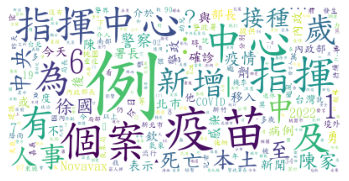

<Figure size 48000x48000 with 0 Axes>

In [31]:
#使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary
Sentence = jieba.cut_for_search(articleAll)

hash = {}

for item in Sentence:        #計算切割出的字的出現次數
    
    if item in stopwords:   #將不要的字詞排除在雲之外，
        continue
    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1
        
wc = WordCloud(font_path="TW-Kai-98_1_new.ttf",   #設定字體
              background_color="white",         #背景顏色
              max_words = 2000,                 #文字雲顯示最大詞數
              stopwords = stopwords)            #停用字詞

#使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)

#進行視覺化的呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize = (80,80),dpi = 600)
plt.show()
wc.to_file('output.jpg')